In [1]:
from helpers import load_all_data, vectorized_flatten, sigmoid, get_log_loss, get_accuracy, sigmoid_derivative, gradient_update, get_loss_plot, plot_loss
import numpy as np


In [2]:
X_train, y_train, X_dev, y_dev, X_test, y_test = load_all_data("../setup/data")

In [3]:
h1 = 32
lr = 0.1

In [4]:
def initialize(X): 

    
    dim1 = 1/np.sqrt(X.shape[0])
    W1 = dim1 * np.random.randn(h1, 28**2)
    
    dim2 = 1/np.sqrt(W1.shape[1])
    W2 = dim2 * np.random.randn(1, h1)
    
    b1 = np.zeros((h1, 1))
    b2 = np.zeros((1, 1))
    
    weights = (W1, W2)
    biases = (b1, b2)
    
    return weights, biases

In [5]:
def forward_pass(X, weights, biases):

    W1, W2 = weights
    b1, b2 = biases
    
    z1 = W1 @ X + b1
    a1 = sigmoid(z1)
    
    z2 = W2 @ z1 + b2
    a2 = sigmoid(z2)
    
    
    
    activations = (z1, a1, z2, a2)
    
    return activations

In [6]:
def backpropagation(X, y, weights, biases, activations):
    
    W1, W2 = weights
    b1, b2 = biases
    z1, a1, z2, a2 = activations
    m = y.shape[1]
    #print(m)   
    dz2 = a2 - y
    #print("dz3", dz3.shape)
    
   
    dW2 = np.dot(dz2, a1.T)/m
    #print("dW2", dW2.shape)
    
    db2 = np.sum(dz2, axis=1).reshape(-1, 1)/m
    #print("db2", db2.shape)
    
    da1 = np.dot(W2.T, dz2)
    #print("da1", da1.shape)
    
    dz1 = da1 * sigmoid_derivative(z1)
    #print("dz1", dz1.shape)
    
    dW1 = np.dot(dz1, X.T)/m
    #print("dW1", dW1.shape)
    
    db1 = np.sum(dz1, axis=1).reshape(-1, 1)/m
    #print("db1", db1.shape)
    
    return db1, dW1, db2, dW2

In [7]:
def update_parameters(weights, biases, gradients, learning_rate):
    
    W1, W2 = weights
    b1, b2 = biases
    
    db1, dW1, db2, dW2 = gradients
    
    W1 = gradient_update(W1, learning_rate, dW1)
    W2 = gradient_update(W2, learning_rate, dW2)
   
    b1 = gradient_update(b1, learning_rate, db1)
    b2 = gradient_update(b2, learning_rate, db2)
    
    weights = (W1, W2)
    biases = (b1, b2)
    
    return weights, biases

In [8]:
X_train_flattened = vectorized_flatten(X_train)
X_dev_flattened = vectorized_flatten(X_dev)
X_test_flattened = vectorized_flatten(X_test)

y_train = y_train.reshape(1, -1)
y_dev = y_dev.reshape(1, -1)
y_test = y_test.reshape(1, -1)



In [9]:
weights, biases = initialize(X_train_flattened)
epochs = 200

history = {
    "weights": [weights],
    "losses": [], 
    "biases": [biases],
    "accuracies": []
}
def batch_training_without_momentum(batch_size,weights,biases,history,X,y):
    offset = 0
    for epoch in range(epochs):
        offset = 0
        weights = history['weights'][epoch]
        biases = history['biases'][epoch]
        while offset <max(y_train.shape):
            if offset%1000==0 :
                print("epoch :",epoch," batch:",offset)
            else :
                a=1
            if offset+batch_size >=max(y_train.shape):
                X_batch = X[:,offset:]
                y_batch = y[:,offset:]
            else :    
                X_batch = X[:,offset:offset+batch_size]
                y_batch = y[:,offset:offset+batch_size]
            
            

            activations = forward_pass(X_batch, weights, biases)
            gradients = backpropagation(X_batch, y_batch, weights, biases, activations)

            
            weights, biases = update_parameters(weights, biases, gradients, lr)
            offset = offset+batch_size
        activations_full = forward_pass(X, weights, biases)
        y_prob = activations_full[-1]
        y_pred = np.where(y_prob > 0.5, 1, 0)

        #print(y,y_prob)
        loss = get_log_loss(y, y_prob)
        accuracy = get_accuracy(y, y_pred)

        history["weights"].append(weights)
        history["losses"].append(loss)
        history["biases"].append(biases)
        history["accuracies"].append(accuracy)

        if np.isnan(loss):
            break

        print("loss after epoch: ",epoch,": ",loss)
    return history

# 3.4.1 (a) full batch without momentum

In [10]:
history = batch_training_without_momentum(max(y_train.shape),weights,biases,history,X_train_flattened,y_train)

epoch : 0  batch: 0
[[0 0 1 ... 1 1 1]] [[0.51683451 0.52621072 0.53081802 ... 0.51617887 0.55526827 0.53678778]]
loss after epoch:  0 :  0.6803302017363853
epoch : 1  batch: 0
[[0 0 1 ... 1 1 1]] [[0.51508375 0.52678128 0.53247215 ... 0.51678713 0.55883568 0.53929417]]
loss after epoch:  1 :  0.6784212178805766
epoch : 2  batch: 0
[[0 0 1 ... 1 1 1]] [[0.51319957 0.52725386 0.5340661  ... 0.5173295  0.56234985 0.54171875]]
loss after epoch:  2 :  0.6764843594310961
epoch : 3  batch: 0
[[0 0 1 ... 1 1 1]] [[0.51117311 0.52763886 0.53561187 ... 0.51781194 0.56583008 0.54407814]]
loss after epoch:  3 :  0.6745078255091034
epoch : 4  batch: 0
[[0 0 1 ... 1 1 1]] [[0.50899421 0.52794559 0.53712055 ... 0.5182397  0.56929445 0.54638764]]
loss after epoch:  4 :  0.6724798937372592
epoch : 5  batch: 0
[[0 0 1 ... 1 1 1]] [[0.50665151 0.52818239 0.53860241 ... 0.51861731 0.57275999 0.54866138]]
loss after epoch:  5 :  0.6703889120614855
epoch : 6  batch: 0
[[0 0 1 ... 1 1 1]] [[0.50413264 0.528

[[0 0 1 ... 1 1 1]] [[0.16779745 0.52108591 0.67166531 ... 0.51751477 0.85569385 0.7293567 ]]
loss after epoch:  52 :  0.44357232975213096
epoch : 53  batch: 0
[[0 0 1 ... 1 1 1]] [[0.16100082 0.51985393 0.67538006 ... 0.51717468 0.86169615 0.73372846]]
loss after epoch:  53 :  0.43828767808915775
epoch : 54  batch: 0
[[0 0 1 ... 1 1 1]] [[0.15445881 0.51849594 0.6790425  ... 0.51680016 0.86750221 0.73800113]]
loss after epoch:  54 :  0.4330850361238106
epoch : 55  batch: 0
[[0 0 1 ... 1 1 1]] [[0.14816996 0.51701043 0.68265023 ... 0.51639124 0.87311063 0.74217357]]
loss after epoch:  55 :  0.4279643123658837
epoch : 56  batch: 0
[[0 0 1 ... 1 1 1]] [[0.14213159 0.51539644 0.68620139 ... 0.51594817 0.87852108 0.74624543]]
loss after epoch:  56 :  0.4229251042018301
epoch : 57  batch: 0
[[0 0 1 ... 1 1 1]] [[0.13633995 0.51365359 0.68969459 ... 0.51547138 0.88373426 0.75021702]]
loss after epoch:  57 :  0.4179667529214744
epoch : 58  batch: 0
[[0 0 1 ... 1 1 1]] [[0.13079038 0.511782   

[[0 0 1 ... 1 1 1]] [[0.0234729  0.32174898 0.81587025 ... 0.47049676 0.98711873 0.88439152]]
loss after epoch:  110 :  0.24572480949753253
epoch : 111  batch: 0
[[0 0 1 ... 1 1 1]] [[0.02291071 0.31808192 0.81761614 ... 0.46965839 0.98755494 0.88629381]]
loss after epoch:  111 :  0.24382739650262164
epoch : 112  batch: 0
[[0 0 1 ... 1 1 1]] [[0.02236751 0.3144566  0.81934592 ... 0.46882566 0.98797265 0.88817763]]
loss after epoch:  112 :  0.24196767167905536
epoch : 113  batch: 0
[[0 0 1 ... 1 1 1]] [[0.02184248 0.31087361 0.82105959 ... 0.46799854 0.98837277 0.89004256]]
loss after epoch:  113 :  0.2401449066279094
epoch : 114  batch: 0
[[0 0 1 ... 1 1 1]] [[0.02133485 0.30733347 0.82275718 ... 0.46717703 0.98875614 0.89188822]]
loss after epoch:  114 :  0.23835837659219591
epoch : 115  batch: 0
[[0 0 1 ... 1 1 1]] [[0.02084388 0.30383659 0.82443867 ... 0.46636112 0.98912357 0.89371423]]
loss after epoch:  115 :  0.23660736133959076
epoch : 116  batch: 0
[[0 0 1 ... 1 1 1]] [[0.02036

[[0 0 1 ... 1 1 1]] [[0.00856543 0.18504195 0.88600188 ... 0.43364894 0.99694573 0.95505135]]
loss after epoch:  162 :  0.18317681557242246
epoch : 163  batch: 0
[[0 0 1 ... 1 1 1]] [[0.00843384 0.18331467 0.8869728  ... 0.43305677 0.99701204 0.9558726 ]]
loss after epoch:  163 :  0.1824664056696167
epoch : 164  batch: 0
[[0 0 1 ... 1 1 1]] [[0.00830523 0.18161277 0.88793157 ... 0.43246826 0.99707642 0.95667748]]
loss after epoch:  164 :  0.18176790653040795
epoch : 165  batch: 0
[[0 0 1 ... 1 1 1]] [[0.0081795  0.17993581 0.88887831 ... 0.43188338 0.99713894 0.95746627]]
loss after epoch:  165 :  0.18108106094438248
epoch : 166  batch: 0
[[0 0 1 ... 1 1 1]] [[0.00805657 0.17828335 0.88981317 ... 0.43130208 0.99719966 0.95823926]]
loss after epoch:  166 :  0.18040561804284144
epoch : 167  batch: 0
[[0 0 1 ... 1 1 1]] [[0.00793636 0.17665497 0.89073629 ... 0.43072433 0.99725864 0.95899673]]
loss after epoch:  167 :  0.17974133313809268
epoch : 168  batch: 0
[[0 0 1 ... 1 1 1]] [[0.00781

In [11]:
best_epoch = np.array(history["losses"][:-1]).argmin()
print(f"best accuracy: {history['accuracies'][best_epoch]}")
print(f"best loss: {history['losses'][best_epoch]}")
print(f"best epoch: {best_epoch}")

best accuracy: 0.9570833333333333
best loss: 0.16358859121053057
best epoch: 198


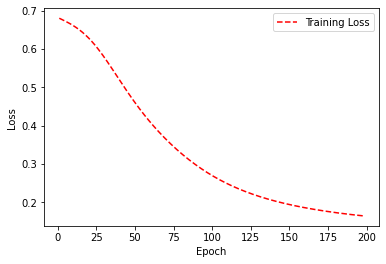

In [12]:
plot_loss("loss.png", history["losses"][:-2])

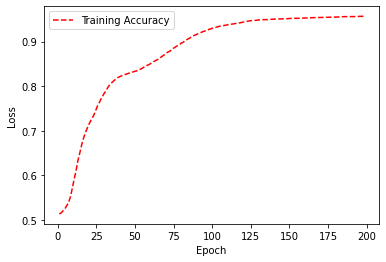

In [13]:
plot_loss("accuracy.png", history["accuracies"][:-2], label='Training Accuracy')

# 3.4.1 (b) stochastic without momentum 

In [14]:
weights, biases = initialize(X_train_flattened)
epochs = 200

history = {
    "weights": [weights],
    "losses": [], 
    "biases": [biases],
    "accuracies": []
}

history = batch_training_without_momentum(1,weights,biases,history,X_train_flattened,y_train)

epoch : 0  batch: 0
epoch : 0  batch: 1000
epoch : 0  batch: 2000
epoch : 0  batch: 3000
epoch : 0  batch: 4000
epoch : 0  batch: 5000
epoch : 0  batch: 6000
epoch : 0  batch: 7000
epoch : 0  batch: 8000
epoch : 0  batch: 9000
epoch : 0  batch: 10000
epoch : 0  batch: 11000
[[0 0 1 ... 1 1 1]] [[0.00159318 0.42296023 0.99999802 ... 0.99249157 1.         1.        ]]
loss after epoch:  0 :  1.0150500344172626
epoch : 1  batch: 0
epoch : 1  batch: 1000
epoch : 1  batch: 2000
epoch : 1  batch: 3000
epoch : 1  batch: 4000
epoch : 1  batch: 5000
epoch : 1  batch: 6000
epoch : 1  batch: 7000
epoch : 1  batch: 8000
epoch : 1  batch: 9000
epoch : 1  batch: 10000
epoch : 1  batch: 11000
[[0 0 1 ... 1 1 1]] [[2.86908350e-23 1.42123373e-04 1.00000000e+00 ... 9.98282705e-01
  1.00000000e+00 1.00000000e+00]]
loss after epoch:  1 :  0.6712269816265294
epoch : 2  batch: 0
epoch : 2  batch: 1000
epoch : 2  batch: 2000
epoch : 2  batch: 3000
epoch : 2  batch: 4000
epoch : 2  batch: 5000
epoch : 2  batc

/Users/sarthak/Documents/intro-dl/src/helpers.py:137: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


epoch : 3  batch: 8000
epoch : 3  batch: 9000
epoch : 3  batch: 10000
epoch : 3  batch: 11000
[[0 0 1 ... 1 1 1]] [[1.32291918e-94 1.32735903e-58 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]
loss after epoch:  3 :  0.7396653875483937
epoch : 4  batch: 0
epoch : 4  batch: 1000
epoch : 4  batch: 2000
epoch : 4  batch: 3000
epoch : 4  batch: 4000
epoch : 4  batch: 5000
epoch : 4  batch: 6000
epoch : 4  batch: 7000
epoch : 4  batch: 8000
epoch : 4  batch: 9000
epoch : 4  batch: 10000
epoch : 4  batch: 11000
[[0 0 1 ... 1 1 1]] [[1.39101273e-43 4.88330991e-49 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]
loss after epoch:  4 :  1.2523903875191584
epoch : 5  batch: 0
epoch : 5  batch: 1000
epoch : 5  batch: 2000
epoch : 5  batch: 3000
epoch : 5  batch: 4000
epoch : 5  batch: 5000
epoch : 5  batch: 6000
epoch : 5  batch: 7000
epoch : 5  batch: 8000
epoch : 5  batch: 9000
epoch : 5  batch: 10000
epoch : 5  batch: 11000
[[0 0 1 ... 1 1 1]] [[3.403909

epoch : 22  batch: 2000
epoch : 22  batch: 3000
epoch : 22  batch: 4000
epoch : 22  batch: 5000
epoch : 22  batch: 6000
epoch : 22  batch: 7000
epoch : 22  batch: 8000
epoch : 22  batch: 9000
epoch : 22  batch: 10000
epoch : 22  batch: 11000
[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 0. 1. 1.]]
loss after epoch:  22 :  1.641841382562009
epoch : 23  batch: 0
epoch : 23  batch: 1000
epoch : 23  batch: 2000
epoch : 23  batch: 3000
epoch : 23  batch: 4000
epoch : 23  batch: 5000
epoch : 23  batch: 6000
epoch : 23  batch: 7000
epoch : 23  batch: 8000
epoch : 23  batch: 9000
epoch : 23  batch: 10000
epoch : 23  batch: 11000
[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 1. 1. 1.]]
loss after epoch:  23 :  0.7582225244673287
epoch : 24  batch: 0
epoch : 24  batch: 1000
epoch : 24  batch: 2000
epoch : 24  batch: 3000
epoch : 24  batch: 4000
epoch : 24  batch: 5000
epoch : 24  batch: 6000
epoch : 24  batch: 7000
epoch : 24  batch: 8000
epoch : 24  batch: 9000
epoch : 24  batch: 10000
epoch : 24  batch: 11000
[[0 0

epoch : 43  batch: 6000
epoch : 43  batch: 7000
epoch : 43  batch: 8000
epoch : 43  batch: 9000
epoch : 43  batch: 10000
epoch : 43  batch: 11000
[[0 0 1 ... 1 1 1]] [[0.00000000e+000 0.00000000e+000 1.00000000e+000 ... 3.33759261e-198
  1.00000000e+000 1.00000000e+000]]
loss after epoch:  43 :  0.7423640484487931
epoch : 44  batch: 0
epoch : 44  batch: 1000
epoch : 44  batch: 2000
epoch : 44  batch: 3000
epoch : 44  batch: 4000
epoch : 44  batch: 5000
epoch : 44  batch: 6000
epoch : 44  batch: 7000
epoch : 44  batch: 8000
epoch : 44  batch: 9000
epoch : 44  batch: 10000
epoch : 44  batch: 11000
[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 1. 1. 1.]]
loss after epoch:  44 :  1.4199766082649141
epoch : 45  batch: 0
epoch : 45  batch: 1000
epoch : 45  batch: 2000
epoch : 45  batch: 3000
epoch : 45  batch: 4000
epoch : 45  batch: 5000
epoch : 45  batch: 6000
epoch : 45  batch: 7000
epoch : 45  batch: 8000
epoch : 45  batch: 9000
epoch : 45  batch: 10000
epoch : 45  batch: 11000
[[0 0 1 ... 1 1 1]] 

epoch : 65  batch: 2000
epoch : 65  batch: 3000
epoch : 65  batch: 4000
epoch : 65  batch: 5000
epoch : 65  batch: 6000
epoch : 65  batch: 7000
epoch : 65  batch: 8000
epoch : 65  batch: 9000
epoch : 65  batch: 10000
epoch : 65  batch: 11000
[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 1. 1. 1.]]
loss after epoch:  65 :  0.6797247794057608
epoch : 66  batch: 0
epoch : 66  batch: 1000
epoch : 66  batch: 2000
epoch : 66  batch: 3000
epoch : 66  batch: 4000
epoch : 66  batch: 5000
epoch : 66  batch: 6000
epoch : 66  batch: 7000
epoch : 66  batch: 8000
epoch : 66  batch: 9000
epoch : 66  batch: 10000
epoch : 66  batch: 11000
[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 1. 1. 1.]]
loss after epoch:  66 :  0.720948183911269
epoch : 67  batch: 0
epoch : 67  batch: 1000
epoch : 67  batch: 2000
epoch : 67  batch: 3000
epoch : 67  batch: 4000
epoch : 67  batch: 5000
epoch : 67  batch: 6000
epoch : 67  batch: 7000
epoch : 67  batch: 8000
epoch : 67  batch: 9000
epoch : 67  batch: 10000
epoch : 67  batch: 11000
[[0 0

[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 0. 1. 1.]]
loss after epoch:  86 :  0.6823459636710918
epoch : 87  batch: 0
epoch : 87  batch: 1000
epoch : 87  batch: 2000
epoch : 87  batch: 3000
epoch : 87  batch: 4000
epoch : 87  batch: 5000
epoch : 87  batch: 6000
epoch : 87  batch: 7000
epoch : 87  batch: 8000
epoch : 87  batch: 9000
epoch : 87  batch: 10000
epoch : 87  batch: 11000
[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 1. 1. 1.]]
loss after epoch:  87 :  1.4400310503204057
epoch : 88  batch: 0
epoch : 88  batch: 1000
epoch : 88  batch: 2000
epoch : 88  batch: 3000
epoch : 88  batch: 4000
epoch : 88  batch: 5000
epoch : 88  batch: 6000
epoch : 88  batch: 7000
epoch : 88  batch: 8000
epoch : 88  batch: 9000
epoch : 88  batch: 10000
epoch : 88  batch: 11000
[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 1. 1. 1.]]
loss after epoch:  88 :  0.8400059764839579
epoch : 89  batch: 0
epoch : 89  batch: 1000
epoch : 89  batch: 2000
epoch : 89  batch: 3000
epoch : 89  batch: 4000
epoch : 89  batch: 5000
epoch : 89  bat

epoch : 108  batch: 4000
epoch : 108  batch: 5000
epoch : 108  batch: 6000
epoch : 108  batch: 7000
epoch : 108  batch: 8000
epoch : 108  batch: 9000
epoch : 108  batch: 10000
epoch : 108  batch: 11000
[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 0. 1. 1.]]
loss after epoch:  108 :  0.793816348212614
epoch : 109  batch: 0
epoch : 109  batch: 1000
epoch : 109  batch: 2000
epoch : 109  batch: 3000
epoch : 109  batch: 4000
epoch : 109  batch: 5000
epoch : 109  batch: 6000
epoch : 109  batch: 7000
epoch : 109  batch: 8000
epoch : 109  batch: 9000
epoch : 109  batch: 10000
epoch : 109  batch: 11000
[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 0. 1. 1.]]
loss after epoch:  109 :  0.811261414261421
epoch : 110  batch: 0
epoch : 110  batch: 1000
epoch : 110  batch: 2000
epoch : 110  batch: 3000
epoch : 110  batch: 4000
epoch : 110  batch: 5000
epoch : 110  batch: 6000
epoch : 110  batch: 7000
epoch : 110  batch: 8000
epoch : 110  batch: 9000
epoch : 110  batch: 10000
epoch : 110  batch: 11000
[[0 0 1 ... 1 1 1]] 

epoch : 129  batch: 6000
epoch : 129  batch: 7000
epoch : 129  batch: 8000
epoch : 129  batch: 9000
epoch : 129  batch: 10000
epoch : 129  batch: 11000
[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 0. 1. 1.]]
loss after epoch:  129 :  0.78713182804536
epoch : 130  batch: 0
epoch : 130  batch: 1000
epoch : 130  batch: 2000
epoch : 130  batch: 3000
epoch : 130  batch: 4000
epoch : 130  batch: 5000
epoch : 130  batch: 6000
epoch : 130  batch: 7000
epoch : 130  batch: 8000
epoch : 130  batch: 9000
epoch : 130  batch: 10000
epoch : 130  batch: 11000
[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 0. 1. 1.]]
loss after epoch:  130 :  0.7938161151764744
epoch : 131  batch: 0
epoch : 131  batch: 1000
epoch : 131  batch: 2000
epoch : 131  batch: 3000
epoch : 131  batch: 4000
epoch : 131  batch: 5000
epoch : 131  batch: 6000
epoch : 131  batch: 7000
epoch : 131  batch: 8000
epoch : 131  batch: 9000
epoch : 131  batch: 10000
epoch : 131  batch: 11000
[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 0. 1. 1.]]
loss after epoch:  131 :

epoch : 150  batch: 4000
epoch : 150  batch: 5000
epoch : 150  batch: 6000
epoch : 150  batch: 7000
epoch : 150  batch: 8000
epoch : 150  batch: 9000
epoch : 150  batch: 10000
epoch : 150  batch: 11000
[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 1. 1. 1.]]
loss after epoch:  150 :  0.6896260547027108
epoch : 151  batch: 0
epoch : 151  batch: 1000
epoch : 151  batch: 2000
epoch : 151  batch: 3000
epoch : 151  batch: 4000
epoch : 151  batch: 5000
epoch : 151  batch: 6000
epoch : 151  batch: 7000
epoch : 151  batch: 8000
epoch : 151  batch: 9000
epoch : 151  batch: 10000
epoch : 151  batch: 11000
[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 1. 1. 1.]]
loss after epoch:  151 :  0.639348534773662
epoch : 152  batch: 0
epoch : 152  batch: 1000
epoch : 152  batch: 2000
epoch : 152  batch: 3000
epoch : 152  batch: 4000
epoch : 152  batch: 5000
epoch : 152  batch: 6000
epoch : 152  batch: 7000
epoch : 152  batch: 8000
epoch : 152  batch: 9000
epoch : 152  batch: 10000
epoch : 152  batch: 11000
[[0 0 1 ... 1 1 1]]

epoch : 171  batch: 6000
epoch : 171  batch: 7000
epoch : 171  batch: 8000
epoch : 171  batch: 9000
epoch : 171  batch: 10000
epoch : 171  batch: 11000
[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 0. 1. 1.]]
loss after epoch:  171 :  0.732990037492885
epoch : 172  batch: 0
epoch : 172  batch: 1000
epoch : 172  batch: 2000
epoch : 172  batch: 3000
epoch : 172  batch: 4000
epoch : 172  batch: 5000
epoch : 172  batch: 6000
epoch : 172  batch: 7000
epoch : 172  batch: 8000
epoch : 172  batch: 9000
epoch : 172  batch: 10000
epoch : 172  batch: 11000
[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 0. 1. 1.]]
loss after epoch:  172 :  0.7374027806063559
epoch : 173  batch: 0
epoch : 173  batch: 1000
epoch : 173  batch: 2000
epoch : 173  batch: 3000
epoch : 173  batch: 4000
epoch : 173  batch: 5000
epoch : 173  batch: 6000
epoch : 173  batch: 7000
epoch : 173  batch: 8000
epoch : 173  batch: 9000
epoch : 173  batch: 10000
epoch : 173  batch: 11000
[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 0. 1. 1.]]
loss after epoch:  173 

epoch : 192  batch: 8000
epoch : 192  batch: 9000
epoch : 192  batch: 10000
epoch : 192  batch: 11000
[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 0. 1. 1.]]
loss after epoch:  192 :  0.7705004558441595
epoch : 193  batch: 0
epoch : 193  batch: 1000
epoch : 193  batch: 2000
epoch : 193  batch: 3000
epoch : 193  batch: 4000
epoch : 193  batch: 5000
epoch : 193  batch: 6000
epoch : 193  batch: 7000
epoch : 193  batch: 8000
epoch : 193  batch: 9000
epoch : 193  batch: 10000
epoch : 193  batch: 11000
[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 0. 1. 1.]]
loss after epoch:  193 :  0.7315359238493025
epoch : 194  batch: 0
epoch : 194  batch: 1000
epoch : 194  batch: 2000
epoch : 194  batch: 3000
epoch : 194  batch: 4000
epoch : 194  batch: 5000
epoch : 194  batch: 6000
epoch : 194  batch: 7000
epoch : 194  batch: 8000
epoch : 194  batch: 9000
epoch : 194  batch: 10000
epoch : 194  batch: 11000
[[0 0 1 ... 1 1 1]] [[0. 0. 1. ... 0. 1. 1.]]
loss after epoch:  194 :  0.7400891271171123
epoch : 195  batch: 0
epoch

In [15]:
best_epoch = np.array(history["losses"][:-1]).argmin()
print(f"best accuracy: {history['accuracies'][best_epoch]}")
print(f"best loss: {history['losses'][best_epoch]}")
print(f"best epoch: {best_epoch}")

best accuracy: 0.9658333333333333
best loss: 0.5485817636040897
best epoch: 56


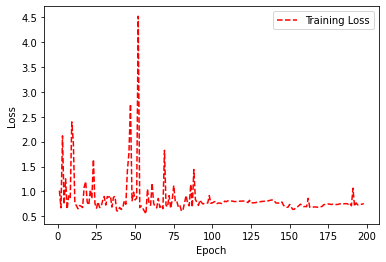

In [16]:
plot_loss("loss.png", history["losses"][:-2])

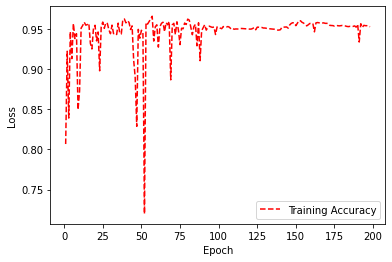

In [17]:
plot_loss("accuracy.png", history["accuracies"][:-2], label='Training Accuracy')

# 3.4.1 (c) minibatch without momentum


In [18]:
weights, biases = initialize(X_train_flattened)
epochs = 200

history = {
    "weights": [weights],
    "losses": [], 
    "biases": [biases],
    "accuracies": []
}

history = batch_training_without_momentum(100,weights,biases,history,X_train_flattened,y_train)

epoch : 0  batch: 0
epoch : 0  batch: 1000
epoch : 0  batch: 2000
epoch : 0  batch: 3000
epoch : 0  batch: 4000
epoch : 0  batch: 5000
epoch : 0  batch: 6000
epoch : 0  batch: 7000
epoch : 0  batch: 8000
epoch : 0  batch: 9000
epoch : 0  batch: 10000
epoch : 0  batch: 11000
[[0 0 1 ... 1 1 1]] [[0.04657688 0.45007448 0.76499365 ... 0.42729757 0.97771382 0.81674895]]
loss after epoch:  0 :  0.2956840861734671
epoch : 1  batch: 0
epoch : 1  batch: 1000
epoch : 1  batch: 2000
epoch : 1  batch: 3000
epoch : 1  batch: 4000
epoch : 1  batch: 5000
epoch : 1  batch: 6000
epoch : 1  batch: 7000
epoch : 1  batch: 8000
epoch : 1  batch: 9000
epoch : 1  batch: 10000
epoch : 1  batch: 11000
[[0 0 1 ... 1 1 1]] [[0.00648807 0.19662232 0.9117267  ... 0.37347386 0.99905346 0.97465311]]
loss after epoch:  1 :  0.16677522454217084
epoch : 2  batch: 0
epoch : 2  batch: 1000
epoch : 2  batch: 2000
epoch : 2  batch: 3000
epoch : 2  batch: 4000
epoch : 2  batch: 5000
epoch : 2  batch: 6000
epoch : 2  batch:

epoch : 21  batch: 4000
epoch : 21  batch: 5000
epoch : 21  batch: 6000
epoch : 21  batch: 7000
epoch : 21  batch: 8000
epoch : 21  batch: 9000
epoch : 21  batch: 10000
epoch : 21  batch: 11000
[[0 0 1 ... 1 1 1]] [[5.37146287e-04 1.24856931e-02 9.75619907e-01 ... 1.87138892e-01
  9.99998105e-01 9.99754993e-01]]
loss after epoch:  21 :  0.0969802445592519
epoch : 22  batch: 0
epoch : 22  batch: 1000
epoch : 22  batch: 2000
epoch : 22  batch: 3000
epoch : 22  batch: 4000
epoch : 22  batch: 5000
epoch : 22  batch: 6000
epoch : 22  batch: 7000
epoch : 22  batch: 8000
epoch : 22  batch: 9000
epoch : 22  batch: 10000
epoch : 22  batch: 11000
[[0 0 1 ... 1 1 1]] [[5.10322386e-04 1.18569318e-02 9.75777165e-01 ... 1.89232124e-01
  9.99998283e-01 9.99767421e-01]]
loss after epoch:  22 :  0.0963604606530155
epoch : 23  batch: 0
epoch : 23  batch: 1000
epoch : 23  batch: 2000
epoch : 23  batch: 3000
epoch : 23  batch: 4000
epoch : 23  batch: 5000
epoch : 23  batch: 6000
epoch : 23  batch: 7000
ep

epoch : 40  batch: 8000
epoch : 40  batch: 9000
epoch : 40  batch: 10000
epoch : 40  batch: 11000
[[0 0 1 ... 1 1 1]] [[2.18146881e-04 5.46115676e-03 9.77766074e-01 ... 2.37224097e-01
  9.99999520e-01 9.99887146e-01]]
loss after epoch:  40 :  0.08871424049550342
epoch : 41  batch: 0
epoch : 41  batch: 1000
epoch : 41  batch: 2000
epoch : 41  batch: 3000
epoch : 41  batch: 4000
epoch : 41  batch: 5000
epoch : 41  batch: 6000
epoch : 41  batch: 7000
epoch : 41  batch: 8000
epoch : 41  batch: 9000
epoch : 41  batch: 10000
epoch : 41  batch: 11000
[[0 0 1 ... 1 1 1]] [[2.09359329e-04 5.25604533e-03 9.77904839e-01 ... 2.40397267e-01
  9.99999546e-01 9.99891335e-01]]
loss after epoch:  41 :  0.08842298422130704
epoch : 42  batch: 0
epoch : 42  batch: 1000
epoch : 42  batch: 2000
epoch : 42  batch: 3000
epoch : 42  batch: 4000
epoch : 42  batch: 5000
epoch : 42  batch: 6000
epoch : 42  batch: 7000
epoch : 42  batch: 8000
epoch : 42  batch: 9000
epoch : 42  batch: 10000
epoch : 42  batch: 1100

[[0 0 1 ... 1 1 1]] [[1.07823129e-04 2.77542551e-03 9.81516738e-01 ... 3.03820474e-01
  9.99999828e-01 9.99950028e-01]]
loss after epoch:  59 :  0.08470464741887161
epoch : 60  batch: 0
epoch : 60  batch: 1000
epoch : 60  batch: 2000
epoch : 60  batch: 3000
epoch : 60  batch: 4000
epoch : 60  batch: 5000
epoch : 60  batch: 6000
epoch : 60  batch: 7000
epoch : 60  batch: 8000
epoch : 60  batch: 9000
epoch : 60  batch: 10000
epoch : 60  batch: 11000
[[0 0 1 ... 1 1 1]] [[1.04078318e-04 2.68542664e-03 9.81771299e-01 ... 3.07555446e-01
  9.99999837e-01 9.99952473e-01]]
loss after epoch:  60 :  0.08456728407751156
epoch : 61  batch: 0
epoch : 61  batch: 1000
epoch : 61  batch: 2000
epoch : 61  batch: 3000
epoch : 61  batch: 4000
epoch : 61  batch: 5000
epoch : 61  batch: 6000
epoch : 61  batch: 7000
epoch : 61  batch: 8000
epoch : 61  batch: 9000
epoch : 61  batch: 10000
epoch : 61  batch: 11000
[[0 0 1 ... 1 1 1]] [[1.00449172e-04 2.59900427e-03 9.82030006e-01 ... 3.11304224e-01
  9.999998

epoch : 79  batch: 1000
epoch : 79  batch: 2000
epoch : 79  batch: 3000
epoch : 79  batch: 4000
epoch : 79  batch: 5000
epoch : 79  batch: 6000
epoch : 79  batch: 7000
epoch : 79  batch: 8000
epoch : 79  batch: 9000
epoch : 79  batch: 10000
epoch : 79  batch: 11000
[[0 0 1 ... 1 1 1]] [[4.99777195e-05 1.50802604e-03 9.87066436e-01 ... 3.81460675e-01
  9.99999947e-01 9.99984329e-01]]
loss after epoch:  79 :  0.08289846153804414
epoch : 80  batch: 0
epoch : 80  batch: 1000
epoch : 80  batch: 2000
epoch : 80  batch: 3000
epoch : 80  batch: 4000
epoch : 80  batch: 5000
epoch : 80  batch: 6000
epoch : 80  batch: 7000
epoch : 80  batch: 8000
epoch : 80  batch: 9000
epoch : 80  batch: 10000
epoch : 80  batch: 11000
[[0 0 1 ... 1 1 1]] [[4.78576175e-05 1.46669732e-03 9.87349941e-01 ... 3.85526657e-01
  9.99999950e-01 9.99985333e-01]]
loss after epoch:  80 :  0.08284906350868451
epoch : 81  batch: 0
epoch : 81  batch: 1000
epoch : 81  batch: 2000
epoch : 81  batch: 3000
epoch : 81  batch: 4000


epoch : 99  batch: 4000
epoch : 99  batch: 5000
epoch : 99  batch: 6000
epoch : 99  batch: 7000
epoch : 99  batch: 8000
epoch : 99  batch: 9000
epoch : 99  batch: 10000
epoch : 99  batch: 11000
[[0 0 1 ... 1 1 1]] [[1.87640378e-05 8.97981774e-04 9.92272606e-01 ... 4.65423391e-01
  9.99999985e-01 9.99996308e-01]]
loss after epoch:  99 :  0.08223470811933413
epoch : 100  batch: 0
epoch : 100  batch: 1000
epoch : 100  batch: 2000
epoch : 100  batch: 3000
epoch : 100  batch: 4000
epoch : 100  batch: 5000
epoch : 100  batch: 6000
epoch : 100  batch: 7000
epoch : 100  batch: 8000
epoch : 100  batch: 9000
epoch : 100  batch: 10000
epoch : 100  batch: 11000
[[0 0 1 ... 1 1 1]] [[1.77540834e-05 8.76270775e-04 9.92496609e-01 ... 4.69739742e-01
  9.99999986e-01 9.99996585e-01]]
loss after epoch:  100 :  0.08220810073119074
epoch : 101  batch: 0
epoch : 101  batch: 1000
epoch : 101  batch: 2000
epoch : 101  batch: 3000
epoch : 101  batch: 4000
epoch : 101  batch: 5000
epoch : 101  batch: 6000
epoc

epoch : 118  batch: 2000
epoch : 118  batch: 3000
epoch : 118  batch: 4000
epoch : 118  batch: 5000
epoch : 118  batch: 6000
epoch : 118  batch: 7000
epoch : 118  batch: 8000
epoch : 118  batch: 9000
epoch : 118  batch: 10000
epoch : 118  batch: 11000
[[0 0 1 ... 1 1 1]] [[5.95666349e-06 5.67624125e-04 9.95821446e-01 ... 5.50161611e-01
  9.99999996e-01 9.99999202e-01]]
loss after epoch:  118 :  0.08159627343381899
epoch : 119  batch: 0
epoch : 119  batch: 1000
epoch : 119  batch: 2000
epoch : 119  batch: 3000
epoch : 119  batch: 4000
epoch : 119  batch: 5000
epoch : 119  batch: 6000
epoch : 119  batch: 7000
epoch : 119  batch: 8000
epoch : 119  batch: 9000
epoch : 119  batch: 10000
epoch : 119  batch: 11000
[[0 0 1 ... 1 1 1]] [[5.57508615e-06 5.54045726e-04 9.95968803e-01 ... 5.54802634e-01
  9.99999996e-01 9.99999266e-01]]
loss after epoch:  119 :  0.08155174096433185
epoch : 120  batch: 0
epoch : 120  batch: 1000
epoch : 120  batch: 2000
epoch : 120  batch: 3000
epoch : 120  batch: 

epoch : 137  batch: 1000
epoch : 137  batch: 2000
epoch : 137  batch: 3000
epoch : 137  batch: 4000
epoch : 137  batch: 5000
epoch : 137  batch: 6000
epoch : 137  batch: 7000
epoch : 137  batch: 8000
epoch : 137  batch: 9000
epoch : 137  batch: 10000
epoch : 137  batch: 11000
[[0 0 1 ... 1 1 1]] [[1.49487934e-06 3.51478705e-04 9.98035742e-01 ... 6.41640130e-01
  9.99999999e-01 9.99999843e-01]]
loss after epoch:  137 :  0.08044675069486378
epoch : 138  batch: 0
epoch : 138  batch: 1000
epoch : 138  batch: 2000
epoch : 138  batch: 3000
epoch : 138  batch: 4000
epoch : 138  batch: 5000
epoch : 138  batch: 6000
epoch : 138  batch: 7000
epoch : 138  batch: 8000
epoch : 138  batch: 9000
epoch : 138  batch: 10000
epoch : 138  batch: 11000
[[0 0 1 ... 1 1 1]] [[1.37908006e-06 3.42296586e-04 9.98121085e-01 ... 6.46656409e-01
  9.99999999e-01 9.99999856e-01]]
loss after epoch:  138 :  0.08037011989696839
epoch : 139  batch: 0
epoch : 139  batch: 1000
epoch : 139  batch: 2000
epoch : 139  batch: 

epoch : 157  batch: 1000
epoch : 157  batch: 2000
epoch : 157  batch: 3000
epoch : 157  batch: 4000
epoch : 157  batch: 5000
epoch : 157  batch: 6000
epoch : 157  batch: 7000
epoch : 157  batch: 8000
epoch : 157  batch: 9000
epoch : 157  batch: 10000
epoch : 157  batch: 11000
[[0 0 1 ... 1 1 1]] [[2.53125172e-07 2.02677060e-04 9.99282721e-01 ... 7.45485634e-01
  1.00000000e+00 9.99999973e-01]]
loss after epoch:  157 :  0.07913208192028098
epoch : 158  batch: 0
epoch : 158  batch: 1000
epoch : 158  batch: 2000
epoch : 158  batch: 3000
epoch : 158  batch: 4000
epoch : 158  batch: 5000
epoch : 158  batch: 6000
epoch : 158  batch: 7000
epoch : 158  batch: 8000
epoch : 158  batch: 9000
epoch : 158  batch: 10000
epoch : 158  batch: 11000
[[0 0 1 ... 1 1 1]] [[2.29638596e-07 1.96869436e-04 9.99323238e-01 ... 7.50848751e-01
  1.00000000e+00 9.99999976e-01]]
loss after epoch:  158 :  0.0791014997828349
epoch : 159  batch: 0
epoch : 159  batch: 1000
epoch : 159  batch: 2000
epoch : 159  batch: 3

epoch : 176  batch: 6000
epoch : 176  batch: 7000
epoch : 176  batch: 8000
epoch : 176  batch: 9000
epoch : 176  batch: 10000
epoch : 176  batch: 11000
[[0 0 1 ... 1 1 1]] [[3.68888079e-08 1.14268349e-04 9.99793947e-01 ... 8.43046019e-01
  1.00000000e+00 9.99999996e-01]]
loss after epoch:  176 :  0.07965722577283015
epoch : 177  batch: 0
epoch : 177  batch: 1000
epoch : 177  batch: 2000
epoch : 177  batch: 3000
epoch : 177  batch: 4000
epoch : 177  batch: 5000
epoch : 177  batch: 6000
epoch : 177  batch: 7000
epoch : 177  batch: 8000
epoch : 177  batch: 9000
epoch : 177  batch: 10000
epoch : 177  batch: 11000
[[0 0 1 ... 1 1 1]] [[3.32126419e-08 1.11156949e-04 9.99808824e-01 ... 8.47841312e-01
  1.00000000e+00 9.99999996e-01]]
loss after epoch:  177 :  0.07977137530412115
epoch : 178  batch: 0
epoch : 178  batch: 1000
epoch : 178  batch: 2000
epoch : 178  batch: 3000
epoch : 178  batch: 4000
epoch : 178  batch: 5000
epoch : 178  batch: 6000
epoch : 178  batch: 7000
epoch : 178  batch: 

epoch : 196  batch: 3000
epoch : 196  batch: 4000
epoch : 196  batch: 5000
epoch : 196  batch: 6000
epoch : 196  batch: 7000
epoch : 196  batch: 8000
epoch : 196  batch: 9000
epoch : 196  batch: 10000
epoch : 196  batch: 11000
[[0 0 1 ... 1 1 1]] [[4.23374135e-09 8.65530744e-05 9.99966208e-01 ... 9.25726705e-01
  1.00000000e+00 1.00000000e+00]]
loss after epoch:  196 :  0.08675493590156796
epoch : 197  batch: 0
epoch : 197  batch: 1000
epoch : 197  batch: 2000
epoch : 197  batch: 3000
epoch : 197  batch: 4000
epoch : 197  batch: 5000
epoch : 197  batch: 6000
epoch : 197  batch: 7000
epoch : 197  batch: 8000
epoch : 197  batch: 9000
epoch : 197  batch: 10000
epoch : 197  batch: 11000
[[0 0 1 ... 1 1 1]] [[3.80642991e-09 8.71623669e-05 9.99969801e-01 ... 9.28851314e-01
  1.00000000e+00 1.00000000e+00]]
loss after epoch:  197 :  0.08761714766452329
epoch : 198  batch: 0
epoch : 198  batch: 1000
epoch : 198  batch: 2000
epoch : 198  batch: 3000
epoch : 198  batch: 4000
epoch : 198  batch: 

In [21]:
best_epoch = np.array(history["losses"][:-1]).argmin()
print(f"best accuracy: {history['accuracies'][best_epoch]}")
print(f"best loss: {history['losses'][best_epoch]}")
print(f"best epoch: {best_epoch}")

best accuracy: 0.9784166666666667
best loss: 0.07902847960650407
best epoch: 163


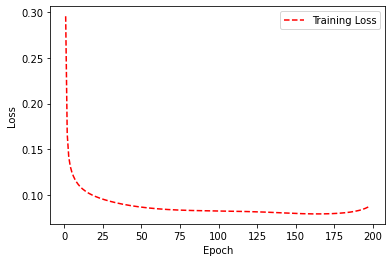

In [19]:
plot_loss("loss.png", history["losses"][:-2])

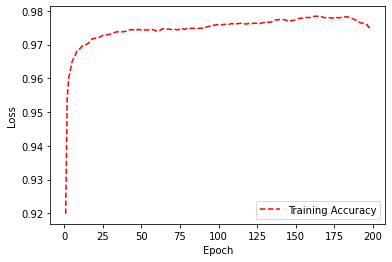

In [20]:
plot_loss("accuracy.png", history["accuracies"][:-2], label='Training Accuracy')